In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train_path = '/content/drive/MyDrive/Vision Transforms/data/train'
valid_path = '/content/drive/MyDrive/Vision Transforms/data/val'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

batch_size = 32
img_height = 60
img_width = 41

train_ds = image_dataset_from_directory(
    directory=train_path,
    seed=777,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = image_dataset_from_directory(
    directory=valid_path,
    seed=777,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 438 files belonging to 5 classes.
Found 159 files belonging to 5 classes.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
!pip install --upgrade tensorflow tensorflow-hub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      S

**First model**

In [ ]:
import tensorflow_hub as hub

vit_model_url = "https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-b16-classification/1"

resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(224, 224),
  tf.keras.layers.Rescaling(1./255)
])

base_model = hub.KerasLayer(vit_model_url, trainable=True)

model = tf.keras.Sequential([
    resize_and_rescale,
    base_model,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


In [ ]:
epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/50


ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.


14/14 [==============================] - 136s 4s/step - loss: 2.6391 - accuracy: 0.2922 - val_loss: 1.0938 - val_accuracy: 0.5849
Epoch 2/50
14/14 [==============================] - 6s 474ms/step - loss: 1.6211 - accuracy: 0.4521 - val_loss: 1.0456 - val_accuracy: 0.6101
Epoch 3/50
14/14 [==============================] - 6s 460ms/step - loss: 1.3050 - accuracy: 0.5685 - val_loss: 0.9517 - val_accuracy: 0.6792
Epoch 4/50
14/14 [==============================] - 6s 465ms/step - loss: 1.1258 - accuracy: 0.6621 - val_loss: 0.7683 - val_accuracy: 0.7421
Epoch 5/50
14/14 [==============================] - 6s 470ms/step - loss: 0.9207 - accuracy: 0.6758 - val_loss: 0.6681 - val_accuracy: 0.7610
Epoch 6/50
14/14 [==============================] - 6s 473ms/step - loss: 0.8854 - accuracy: 0.6826 - val_loss: 0.6302 - val_accuracy: 0.7736
Epoch 7/50
14/14 [==============================] - 7s 488ms/step - loss: 0.7716 - accuracy: 0.7352 - val_loss: 0.6506 - val_accuracy: 0.7862
Epoch 8/50
14/14 [

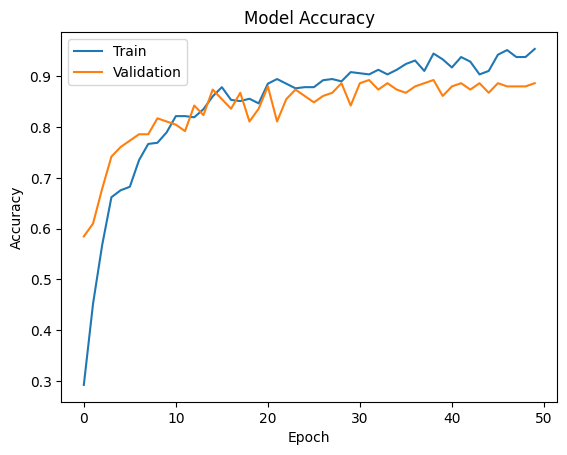

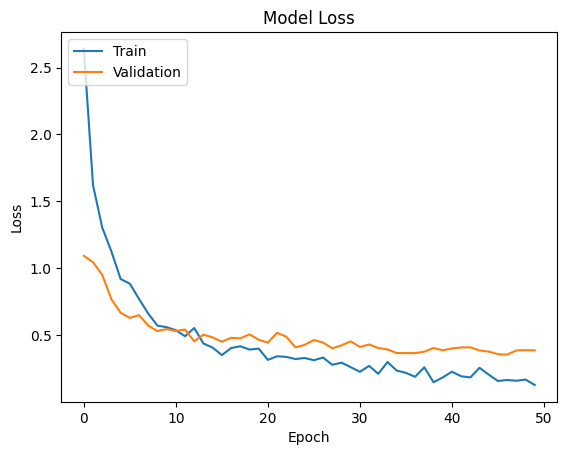

In [ ]:
import matplotlib.pyplot as plt

# Summariz accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


5/5 [==============================] - 2s 375ms/step

Classification Report:
                    precision    recall  f1-score   support

   Severe Physical       0.93      0.78      0.85        36
Cell-Level Defects       0.90      0.87      0.88        30
   Minor Anomalies       0.81      0.89      0.85        28
   Systemic Issues       0.84      0.94      0.89        34
         No Defect       0.97      0.97      0.97        31

          accuracy                           0.89       159
         macro avg       0.89      0.89      0.89       159
      weighted avg       0.89      0.89      0.89       159



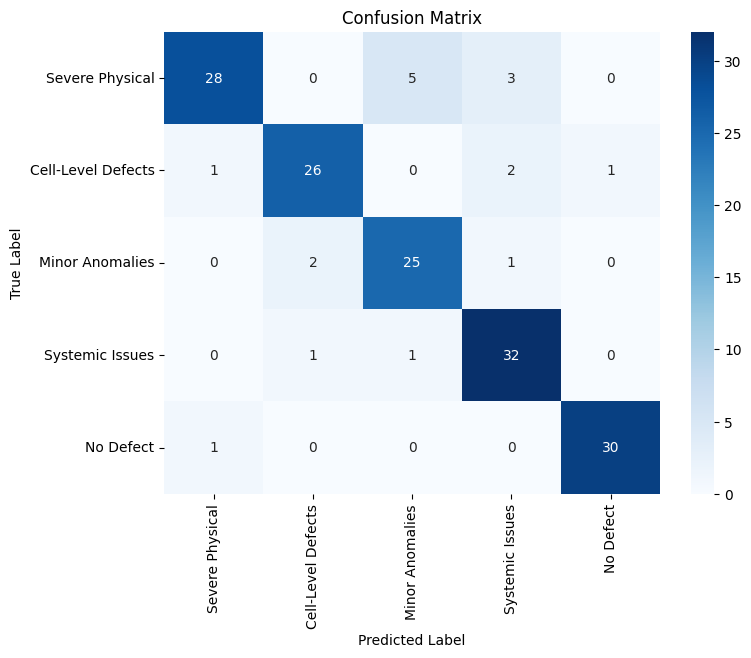


Overall Accuracy: 0.8868


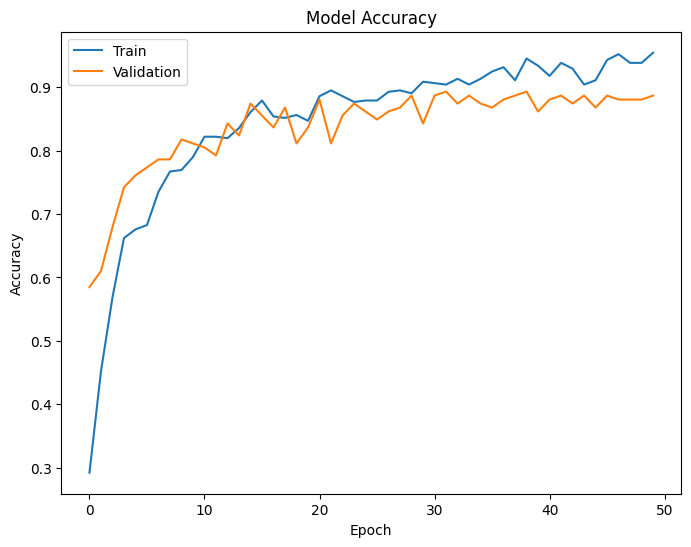

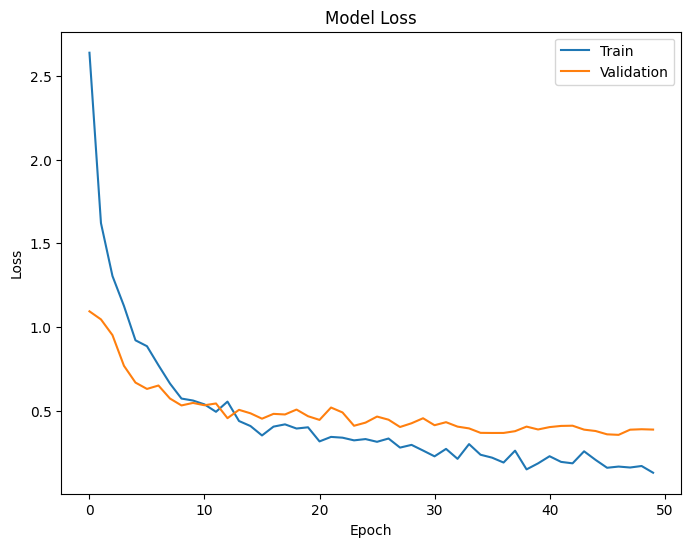

In [ ]:
# Required imports
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define your class names manually
class_names = ['Severe Physical', 'Cell-Level Defects', 'Minor Anomalies', 'Systemic Issues', 'No Defect']

# Assuming your training code is already executed and `model` is trained
# Use the model to predict validation data
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_predictions = model.predict(val_ds)
val_pred_classes = np.argmax(val_predictions, axis=1)

# Calculate classification report
report = classification_report(val_labels, val_pred_classes, target_names=class_names)
print("\nClassification Report:")
print(report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(val_labels, val_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Calculate overall accuracy
accuracy = accuracy_score(val_labels, val_pred_classes)
print(f"\nOverall Accuracy: {accuracy:.4f}")

# Plot the loss and accuracy curves
def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot the training history
plot_history(history)



5/5 [==============================] - 2s 374ms/step

Classification Report:
                    precision    recall  f1-score   support

   Severe Physical       0.93      0.78      0.85        36
Cell-Level Defects       0.90      0.87      0.88        30
   Minor Anomalies       0.81      0.89      0.85        28
   Systemic Issues       0.84      0.94      0.89        34
         No Defect       0.97      0.97      0.97        31

          accuracy                           0.89       159
         macro avg       0.89      0.89      0.89       159
      weighted avg       0.89      0.89      0.89       159



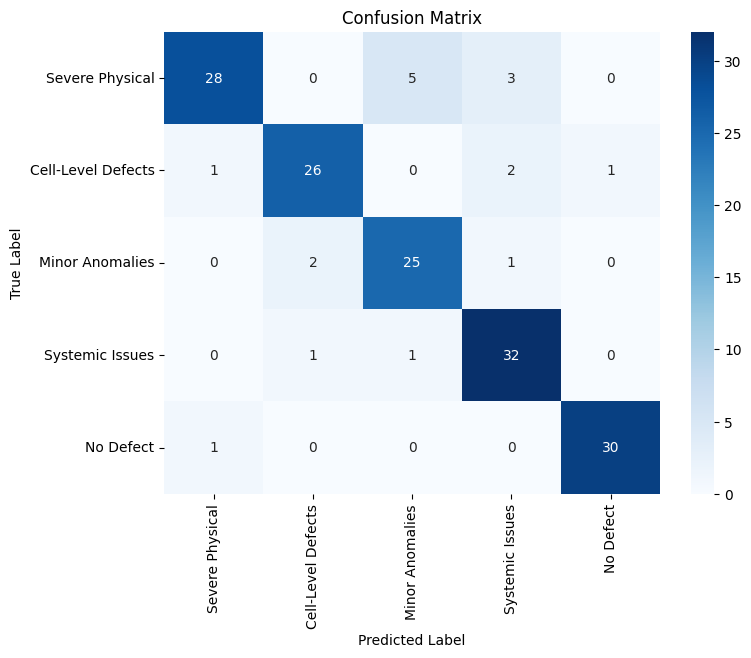


Overall Accuracy: 0.8868


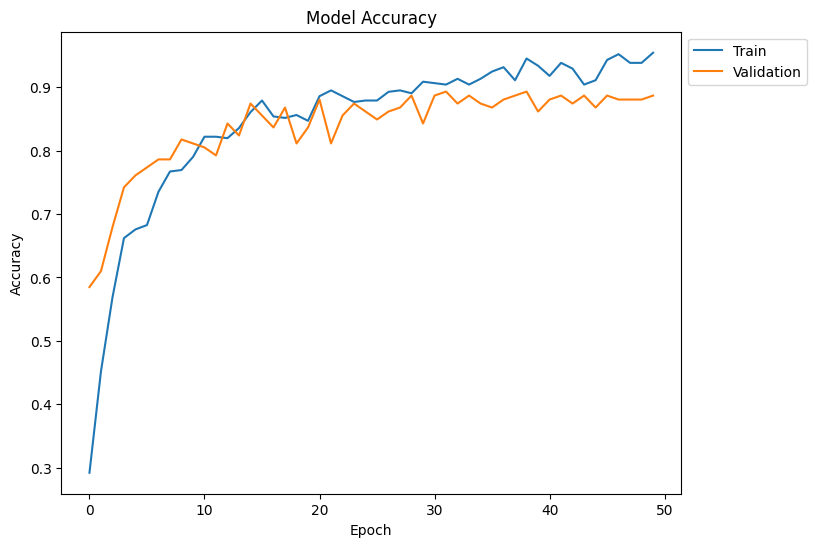

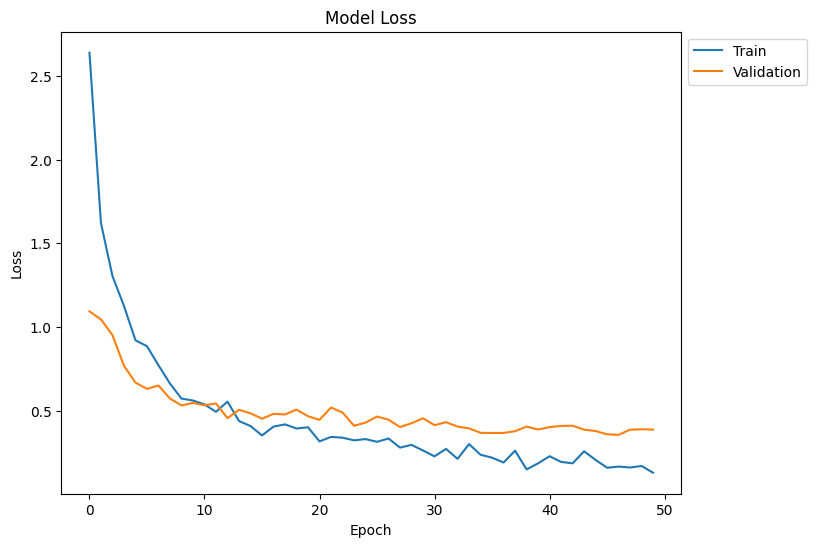

In [ ]:
# Required imports
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define your class names manually
class_names = ['Severe Physical', 'Cell-Level Defects', 'Minor Anomalies', 'Systemic Issues', 'No Defect']

# Assuming your training code is already executed and `model` is trained
# Use the model to predict validation data
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_predictions = model.predict(val_ds)
val_pred_classes = np.argmax(val_predictions, axis=1)

# Calculate classification report
report = classification_report(val_labels, val_pred_classes, target_names=class_names)
print("\nClassification Report:")
print(report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(val_labels, val_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Calculate overall accuracy
accuracy = accuracy_score(val_labels, val_pred_classes)
print(f"\nOverall Accuracy: {accuracy:.4f}")

# Plot the loss and accuracy curves
def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position to be vertical
    plt.show()

    # Plot loss
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position to be vertical
    plt.show()

# Plot the training history
plot_history(history)


5/5 [==============================] - 1s 344ms/step

Classification Report:
                    precision    recall  f1-score   support

   Severe Physical       0.86      0.83      0.85        36
Cell-Level Defects       0.87      0.90      0.89        30
   Minor Anomalies       0.86      0.86      0.86        28
   Systemic Issues       0.91      0.91      0.91        34
         No Defect       0.94      0.94      0.94        31

          accuracy                           0.89       159
         macro avg       0.89      0.89      0.89       159
      weighted avg       0.89      0.89      0.89       159



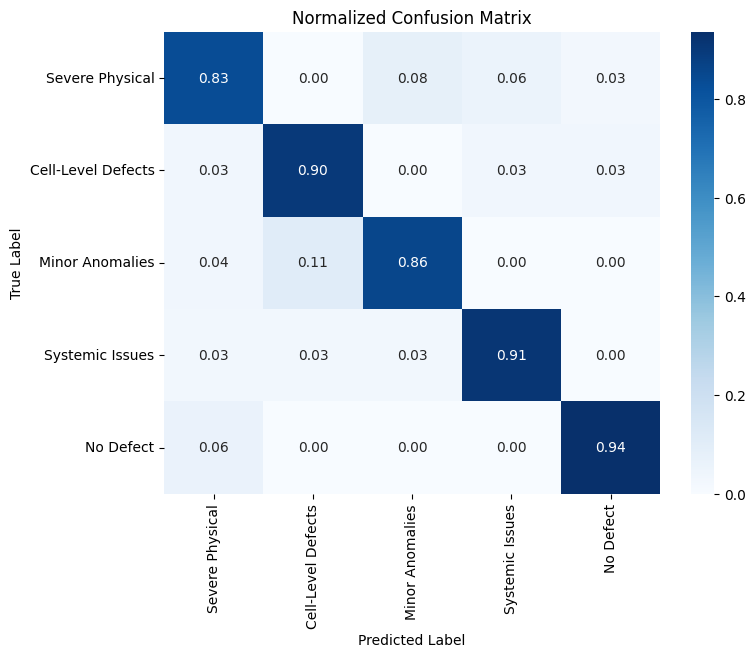


Overall Accuracy: 0.8868


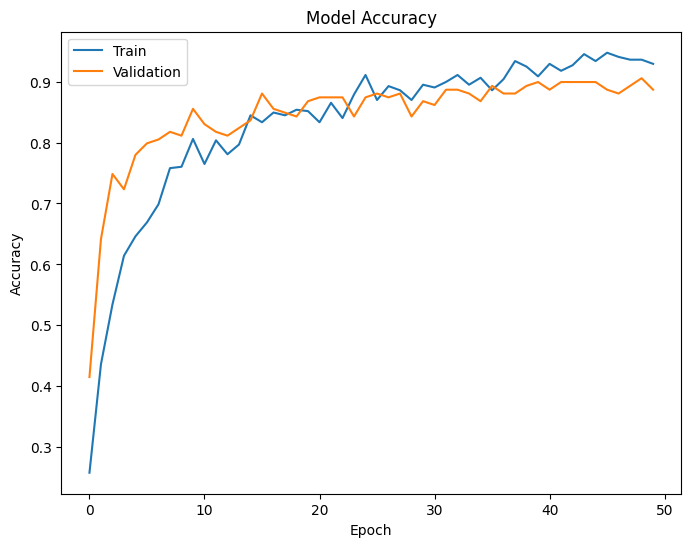

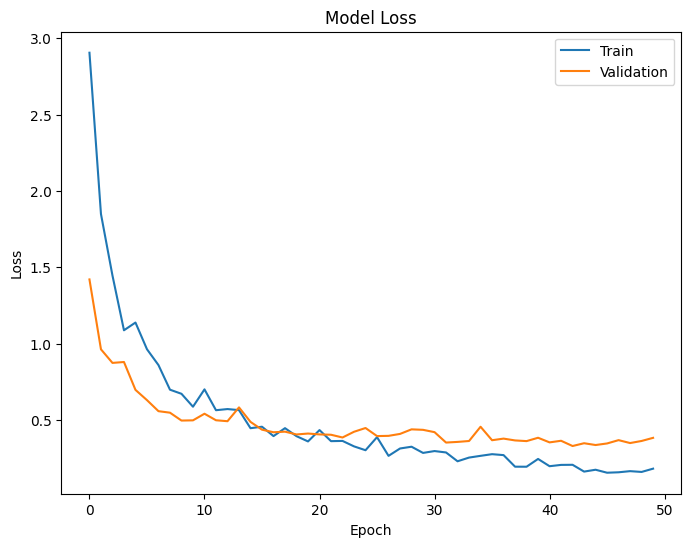

In [ ]:
# Required imports
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define your class names manually
class_names = ['Severe Physical', 'Cell-Level Defects', 'Minor Anomalies', 'Systemic Issues', 'No Defect']

# Assuming your training code is already executed and `model` is trained
# Use the model to predict validation data
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_predictions = model.predict(val_ds)
val_pred_classes = np.argmax(val_predictions, axis=1)

# Calculate classification report
report = classification_report(val_labels, val_pred_classes, target_names=class_names)
print("\nClassification Report:")
print(report)

# Calculate normalized confusion matrix
conf_matrix = confusion_matrix(val_labels, val_pred_classes, normalize='true')

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.show()

# Calculate overall accuracy
accuracy = accuracy_score(val_labels, val_pred_classes)
print(f"\nOverall Accuracy: {accuracy:.4f}")

# Plot the loss and accuracy curves
def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot the training history
plot_history(history)


https://www.kaggle.com/models/spsayakpaul/vision-transformer/tensorFlow2/vit-b32-classification

5/5 [==============================] - 1s 364ms/step

Classification Report:
                    precision    recall  f1-score   support

   Severe Physical       0.93      0.78      0.85        36
Cell-Level Defects       0.90      0.87      0.88        30
   Minor Anomalies       0.81      0.89      0.85        28
   Systemic Issues       0.84      0.94      0.89        34
         No Defect       0.97      0.97      0.97        31

          accuracy                           0.89       159
         macro avg       0.89      0.89      0.89       159
      weighted avg       0.89      0.89      0.89       159



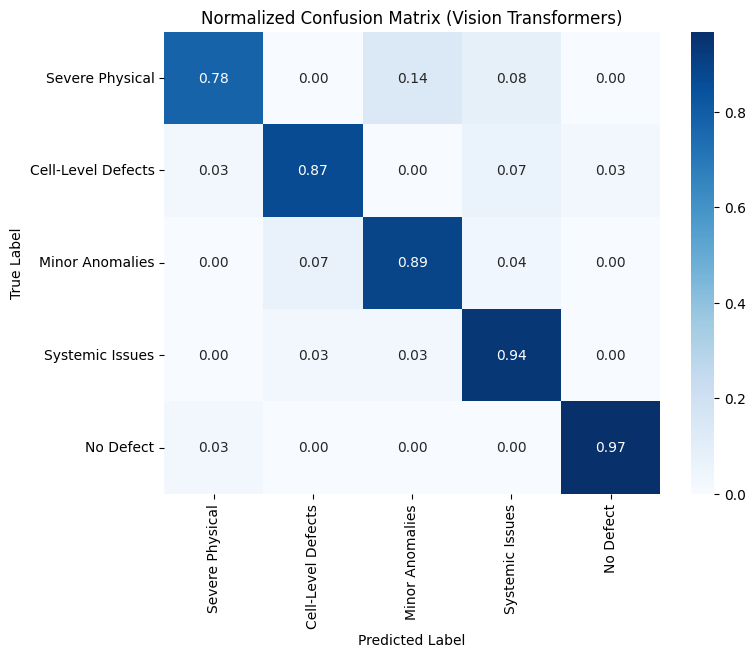


Overall Accuracy: 0.8868


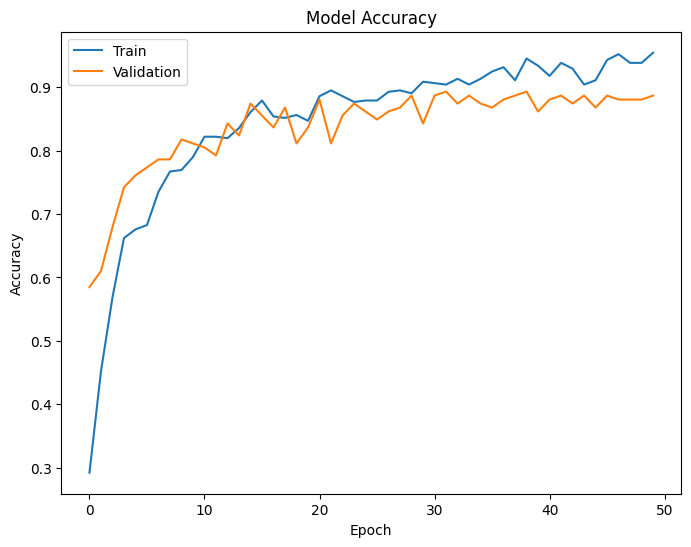

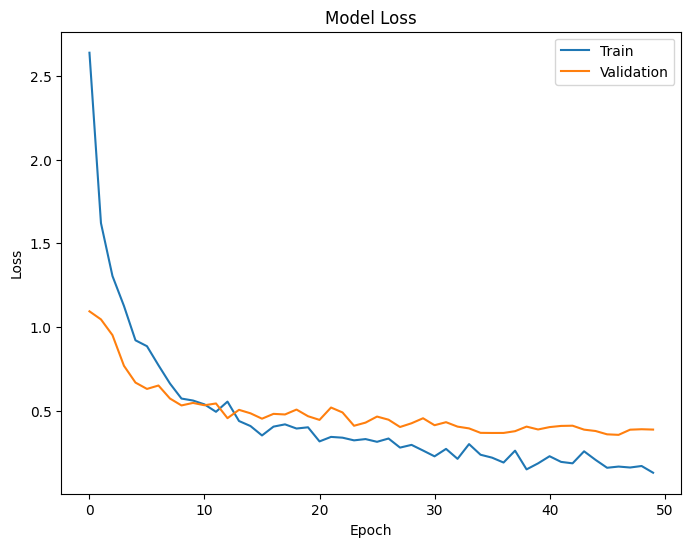

In [ ]:
# Required imports
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define your class names manually
class_names = ['Severe Physical', 'Cell-Level Defects', 'Minor Anomalies', 'Systemic Issues', 'No Defect']

# Assuming your training code is already executed and `model` is trained
# Use the model to predict validation data
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_predictions = model.predict(val_ds)
val_pred_classes = np.argmax(val_predictions, axis=1)

# Calculate classification report
report = classification_report(val_labels, val_pred_classes, target_names=class_names)
print("\nClassification Report:")
print(report)

# Calculate normalized confusion matrix
conf_matrix = confusion_matrix(val_labels, val_pred_classes, normalize='true')

# Plot normalized confusion matrix with Vision Transformers title
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix (Vision Transformers)")
plt.show()

# Calculate overall accuracy
accuracy = accuracy_score(val_labels, val_pred_classes)
print(f"\nOverall Accuracy: {accuracy:.4f}")

# Plot the loss and accuracy curves
def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot the training history
plot_history(history)


5/5 [==============================] - 0s 100ms/step

Classification Report:
                    precision    recall  f1-score   support

Cell-Level Defects       0.82      0.78      0.80        36
   Minor Anomalies       0.80      0.93      0.86        30
         No Defect       0.86      0.89      0.88        28
   Severe Physical       0.97      0.91      0.94        34
   Systemic Issues       1.00      0.94      0.97        31

          accuracy                           0.89       159
         macro avg       0.89      0.89      0.89       159
      weighted avg       0.89      0.89      0.89       159



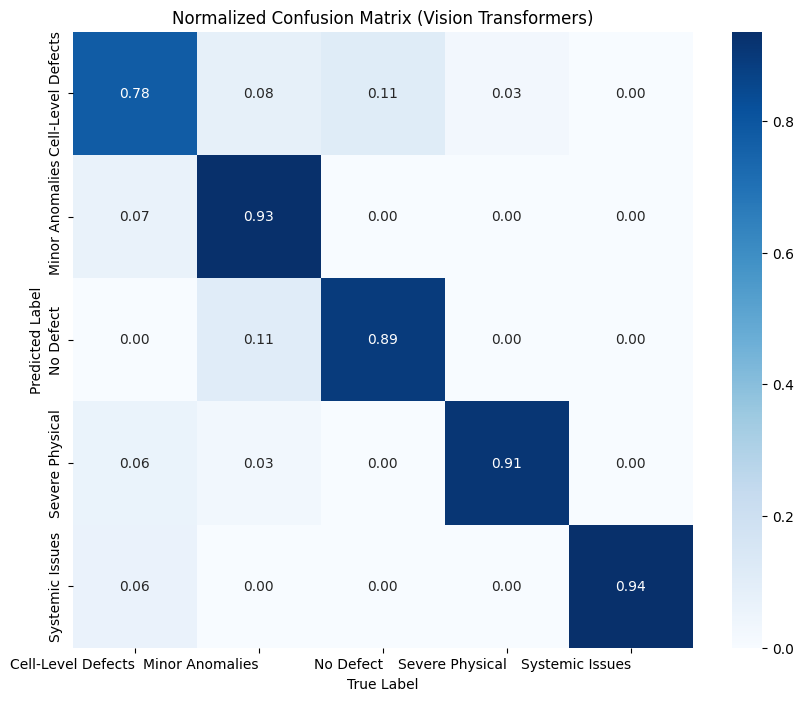


Overall Accuracy: 0.8868


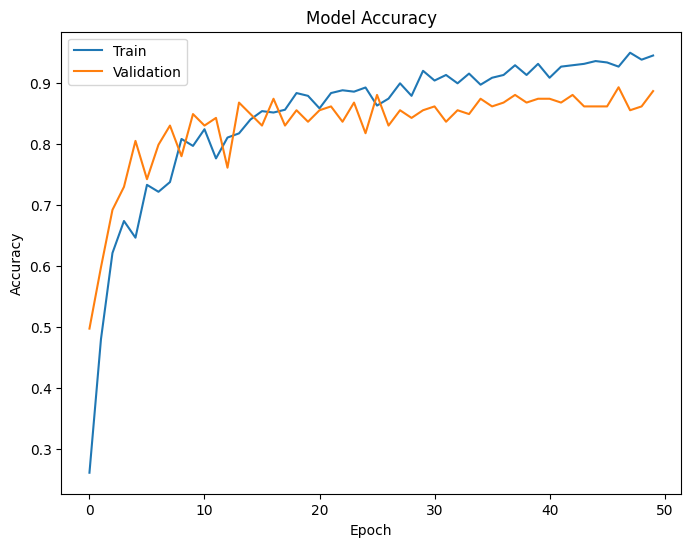

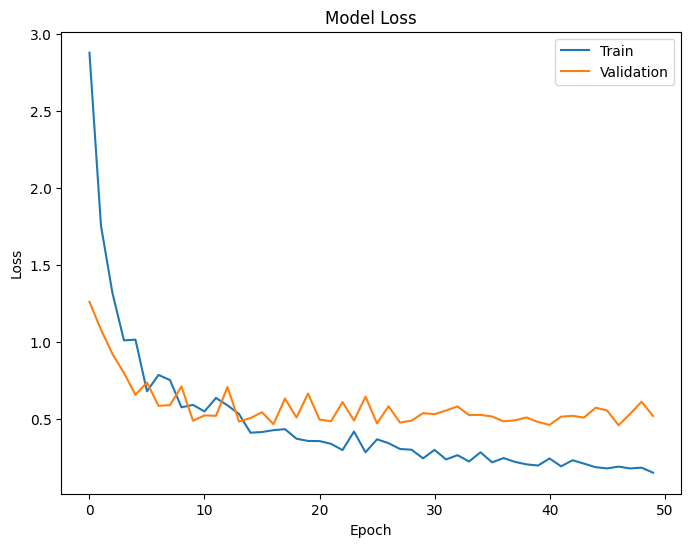

In [ ]:
# Required imports
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define your class names manually
class_names = ['Cell-Level Defects', 'Minor Anomalies', 'No Defect','Severe Physical',  'Systemic Issues']

# Assuming your training code is already executed and `model` is trained
# Use the model to predict validation data
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_predictions = model.predict(val_ds)
val_pred_classes = np.argmax(val_predictions, axis=1)

# Calculate classification report
report = classification_report(val_labels, val_pred_classes, target_names=class_names)
print("\nClassification Report:")
print(report)

# Calculate normalized confusion matrix
conf_matrix = confusion_matrix(val_labels, val_pred_classes, normalize='true')

# Plot normalized confusion matrix with Vision Transformers title
plt.figure(figsize=(10, 8))  # Adjusting figure size for better visibility
ax = sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.ylabel("Predicted Label")  # Changing to correct label
plt.xlabel("True Label")  # Changing to correct label
plt.title("Normalized Confusion Matrix (Vision Transformers)")
plt.xticks(rotation=0, ha="right")  # Rotate labels for better visibility and alignment
plt.yticks(rotation=90)  # Ensure y labels are horizontal
plt.show()

# Calculate overall accuracy
accuracy = accuracy_score(val_labels, val_pred_classes)
print(f"\nOverall Accuracy: {accuracy:.4f}")

# Plot the loss and accuracy curves
def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')  # 'best' position for legend
    plt.show()

    # Plot loss
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')  # 'best' position for legend
    plt.show()

# Plot the training history
plot_history(history)


**Second Model**

In [ ]:
import tensorflow_hub as hub

vit_model_url = "https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-b32-classification/1"

# Resize the images in the model
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(224, 224),
  tf.keras.layers.Rescaling(1./255)
])

base_model = hub.KerasLayer(vit_model_url, trainable=True)

model = tf.keras.Sequential([
    resize_and_rescale,
    base_model,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


In [ ]:
epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/50


ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.


14/14 [==============================] - 22s 668ms/step - loss: 2.8776 - accuracy: 0.2603 - val_loss: 1.2579 - val_accuracy: 0.4969
Epoch 2/50
14/14 [==============================] - 2s 114ms/step - loss: 1.7539 - accuracy: 0.4795 - val_loss: 1.0787 - val_accuracy: 0.5975
Epoch 3/50
14/14 [==============================] - 2s 113ms/step - loss: 1.3152 - accuracy: 0.6210 - val_loss: 0.9196 - val_accuracy: 0.6918
Epoch 4/50
14/14 [==============================] - 2s 113ms/step - loss: 1.0081 - accuracy: 0.6735 - val_loss: 0.7963 - val_accuracy: 0.7296
Epoch 5/50
14/14 [==============================] - 2s 112ms/step - loss: 1.0128 - accuracy: 0.6461 - val_loss: 0.6546 - val_accuracy: 0.8050
Epoch 6/50
14/14 [==============================] - 2s 111ms/step - loss: 0.6773 - accuracy: 0.7329 - val_loss: 0.7343 - val_accuracy: 0.7421
Epoch 7/50
14/14 [==============================] - 2s 112ms/step - loss: 0.7835 - accuracy: 0.7215 - val_loss: 0.5825 - val_accuracy: 0.7987
Epoch 8/50
14/14

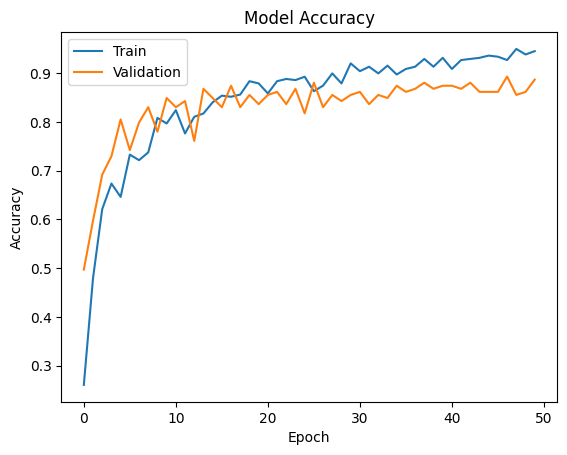

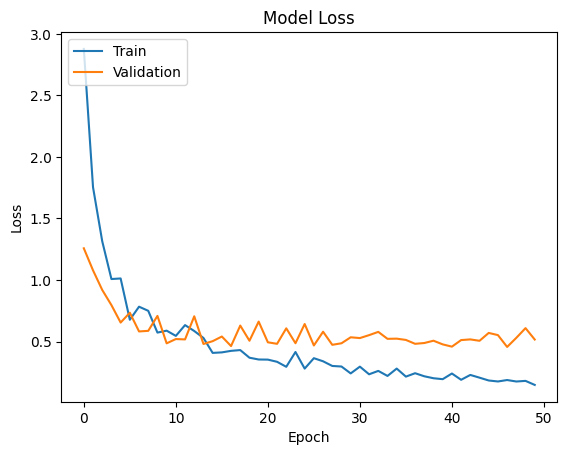

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

5/5 [==============================] - 2s 102ms/step

Classification Report:
                    precision    recall  f1-score   support

   Severe Physical       0.82      0.78      0.80        36
Cell-Level Defects       0.80      0.93      0.86        30
   Minor Anomalies       0.86      0.89      0.88        28
   Systemic Issues       0.97      0.91      0.94        34
         No Defect       1.00      0.94      0.97        31

          accuracy                           0.89       159
         macro avg       0.89      0.89      0.89       159
      weighted avg       0.89      0.89      0.89       159



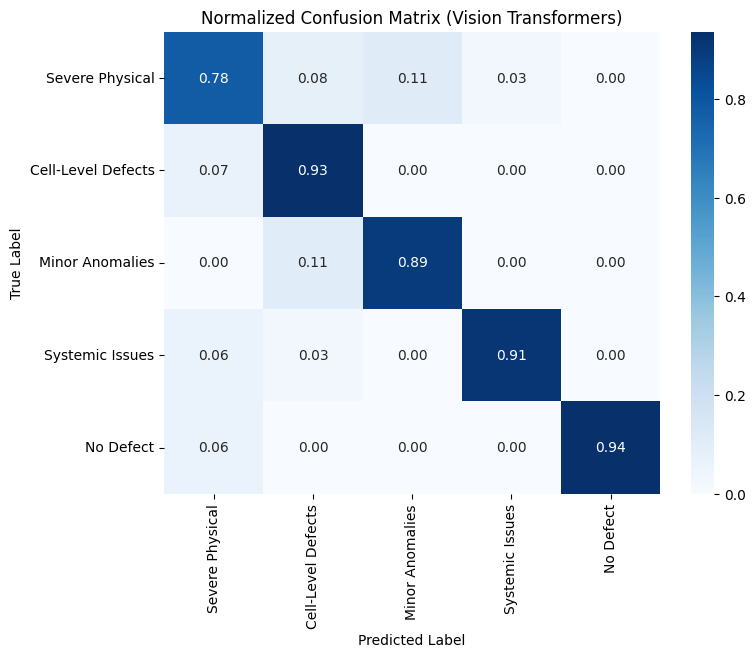


Overall Accuracy: 0.8868


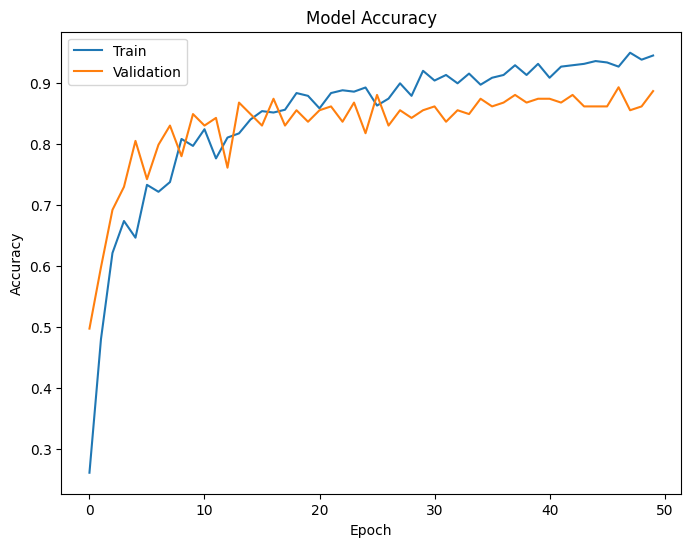

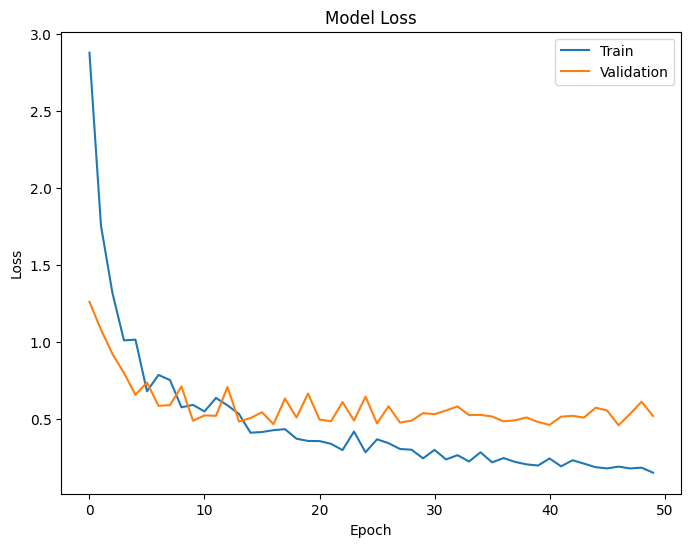

In [ ]:
# Required imports
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define your class names manually
class_names = ['Severe Physical', 'Cell-Level Defects', 'Minor Anomalies', 'Systemic Issues', 'No Defect']

# Assuming your training code is already executed and `model` is trained
# Use the model to predict validation data
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_predictions = model.predict(val_ds)
val_pred_classes = np.argmax(val_predictions, axis=1)

# Calculate classification report
report = classification_report(val_labels, val_pred_classes, target_names=class_names)
print("\nClassification Report:")
print(report)

# Calculate normalized confusion matrix
conf_matrix = confusion_matrix(val_labels, val_pred_classes, normalize='true')

# Plot normalized confusion matrix with Vision Transformers title
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix (Vision Transformers)")
plt.show()

# Calculate overall accuracy
accuracy = accuracy_score(val_labels, val_pred_classes)
print(f"\nOverall Accuracy: {accuracy:.4f}")

# Plot the loss and accuracy curves
def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot the training history
plot_history(history)


3 model
**Vit l16**

In [ ]:
#!pip install --upgrade tensorflow tensorflow-hub
train_path = '/content/drive/MyDrive/Vision Transforms/data/train'
valid_path = '/content/drive/MyDrive/Vision Transforms/data/val'
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

batch_size = 32
img_height = 60
img_width = 41

train_ds = image_dataset_from_directory(
    directory=train_path,
    seed=777,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = image_dataset_from_directory(
    directory=valid_path,
    seed=777,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 438 files belonging to 5 classes.
Found 159 files belonging to 5 classes.


In [ ]:
import tensorflow_hub as hub
from tensorflow.keras.metrics import Recall, Precision

vit_model_url = "https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-l16-classification/1"

resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(224, 224),
  tf.keras.layers.Rescaling(1./255)
])

base_model = hub.KerasLayer(vit_model_url, trainable=True)

model = tf.keras.Sequential([
    resize_and_rescale,
    base_model,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Define F1 score function
def f1_score(y_true, y_pred):
    precision = Precision()(y_true, y_pred)
    recall = Recall()(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

In [ ]:
import tensorflow as tf
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.metrics import Metric, Recall, Precision

# Custom F1 score metric
class F1Score(Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.argmax(y_pred, axis=1)
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy', Recall(), Precision(), f1_score]
)

In [ ]:
for x, y in train_ds.take(1):
    print(x.shape, y.shape)

for x, y in val_ds.take(1):
    print(x.shape, y.shape)


In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

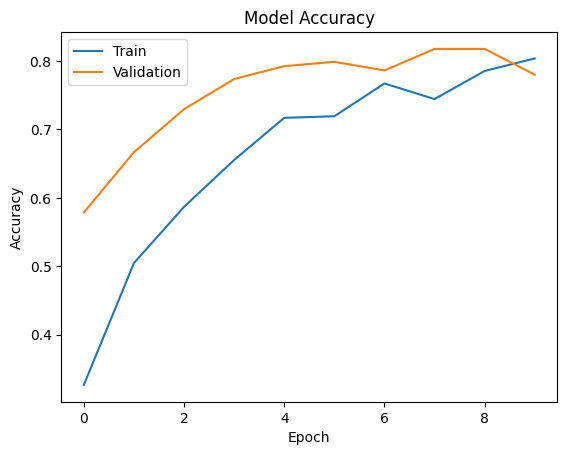

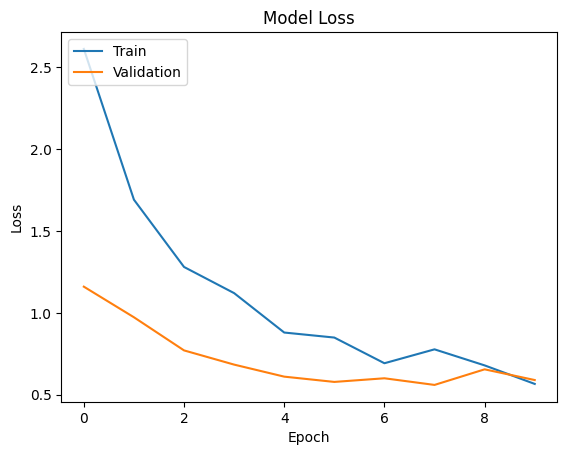

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Summarize history for F1 score and recall
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Vision Transforms/model')

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy', Recall(), Precision(), f1_score]
)